<a href="https://colab.research.google.com/github/sshee0123/Airpotal_crawling/blob/main/DeepLearning/deep06_ANN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers, models
from keras import datasets
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


### 1. Data  Loader

(X_train, y_train), (X_test, y_test) 형식으로 반드시 써야함

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
print(y_train[0])

5


In [5]:
X_train.shape
# 60000 장이 들어있다.

(60000, 28, 28)

### 2. X입력 데이타 전처리  

0~255 0~1 : /255로 나누기

왜? 분산값이 커서(variety)를 낮춰야 성능이 좋아짐

In [7]:
L, W, H = X_train.shape

In [8]:
X_train = X_train.reshape(-1, W*H) # 1차원으로 펼치기
X_test = X_test.reshape(-1, W*H)
X_train.shape # 28 * 28 -> 1차원으로 펼쳐짐.

(60000, 784)

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
# 2). Scaling작업 #0~1 사이에 있는 값으로 조정
X_train = X_train / 255
X_test = X_test / 255

# Scaling작업 확인
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### 3. y값 전처리
##### Y 입력 Data 전처리...One Hot Encoding

ouput layer에는 총 10개의 노드가 있을것이다.  
각각의 노드에서 이미지에 해당하는 예측치를 0~1사이에 있는 확률분포로 표현해준다  
One Hot Encoding 해줘야한다.  
라이브러리 사용..  
keras의 np_utils 클래스 안에 to_categorical 함수를 사용  



In [12]:
print(y_train[30])

3


In [11]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
#확인
print(Y_train[30])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]. 
이 label 3 을 의미한다.

### 4. Settings Parameters

In [13]:
input_size = 28*28
hidden_size = 100
num_classes = 10
num_out = num_classes
num_epochs = 10
batch_size = 100

### 5. Constructor Model

In [14]:
#처음 히든레이어에서 input 노드를 함께 등록해야한다.
#input_shape은 튜플형태로 1차원..
model = models.Sequential()
# Dense 가 layer 임 / 첫 번째 layer 에만 input_shape 튜플 형식으로 넣기.
# keras 는 Dense() 에서 맨 앞에 인자로 출력인자가 먼저옴.
model.add(layers.Dense(hidden_size, activation = "relu", input_shape = (input_size,)))
model.add(layers.Dense(num_classes, activation = "softmax"))

### 6. compile

In [15]:
model.compile('sgd', 'categorical_crossentropy', metrics = ['accuracy'])

### 7. Training

In [17]:
model.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 5s 4ms/step - loss: 1.2439 - accuracy: 0.6919 - val_loss: 0.6596 - val_accuracy: 0.8531
Epoch 2/10
480/480 [==============================] - 2s 4ms/step - loss: 0.5669 - accuracy: 0.8616 - val_loss: 0.4535 - val_accuracy: 0.8842
Epoch 3/10
480/480 [==============================] - 2s 4ms/step - loss: 0.4463 - accuracy: 0.8834 - val_loss: 0.3870 - val_accuracy: 0.8957
Epoch 4/10
480/480 [==============================] - 2s 4ms/step - loss: 0.3951 - accuracy: 0.8927 - val_loss: 0.3529 - val_accuracy: 0.9021
Epoch 5/10
480/480 [==============================] - 2s 4ms/step - loss: 0.3647 - accuracy: 0.8983 - val_loss: 0.3309 - val_accuracy: 0.9068
Epoch 6/10
480/480 [==============================] - 2s 4ms/step - loss: 0.3435 - accuracy: 0.9036 - val_loss: 0.3154 - val_accuracy: 0.9103
Epoch 7/10
480/480 [==============================] - 2s 4ms/step - loss: 0.3274 - accuracy: 0.9071 - val_loss: 0.3024 - val_accuracy: 0.9147
Epoch 

### 8. Evaluate


*은 check_performance 변수가 가지고 있는 그 안의 모든 정보를 다 꺼내오는 역할을 한다.  
check_performance은 모델을 evaluate했을때의 결과로 리턴값이 loss, accuracy값 
2개를 반환한다면 너무 고마운데 리턴을 하나로만 해준다.  
즉, 객체하나를 리턴하는데 그 안에 변수가 숨겨져있다.  

객체 안에있는 멤버를 알 필요없이 사용하는데, 알다시피 format이라는 함수는 앞에 {} 의 갯수만큼 인자값을 넣어줘야 한다.   
*model_performance가 가지고 있는 멤버는 2개 이기 때문에 알아서 자동으로 각각 채워지게 된다.

일부 내가 만들지 않는파이선 패키지에서 리턴값이 저렇게 넘어오는 경우가 많아서 알아두는 것이 필요하다.  
다른 언어에서는 저런 부분이 없다.

In [18]:
model_performance = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Loss :{}, Accuracy :{}'.format(*model_performance))

100/100 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.9214
Loss :0.2781234085559845, Accuracy :0.9214000105857849


### 9. Loss and Accuracy Visualization

In [19]:
import matplotlib.pyplot as plt

# loss 관련된 plot 함수
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'])

# acc 관련된 plot 함수    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation']) 

history 변수에 담아둔 정보로 그래프 그리는 것이다.

In [20]:
# fit()... 트레이닝할떄 나오는 로그메세지들을 다 모아서 리턴해준다..history로 리턴받음
history = model.fit(X_train, Y_train, epochs=50, batch_size=batch_size, validation_split=0.2)


Epoch 1/50
480/480 [==============================] - 2s 4ms/step - loss: 0.2844 - accuracy: 0.9187 - val_loss: 0.2679 - val_accuracy: 0.9239
Epoch 2/50
480/480 [==============================] - 2s 4ms/step - loss: 0.2764 - accuracy: 0.9215 - val_loss: 0.2612 - val_accuracy: 0.9264
Epoch 3/50
480/480 [==============================] - 3s 7ms/step - loss: 0.2690 - accuracy: 0.9234 - val_loss: 0.2552 - val_accuracy: 0.9279
Epoch 4/50
480/480 [==============================] - 3s 7ms/step - loss: 0.2622 - accuracy: 0.9254 - val_loss: 0.2499 - val_accuracy: 0.9294
Epoch 5/50
480/480 [==============================] - 3s 7ms/step - loss: 0.2559 - accuracy: 0.9273 - val_loss: 0.2445 - val_accuracy: 0.9310
Epoch 6/50
480/480 [==============================] - 2s 4ms/step - loss: 0.2499 - accuracy: 0.9296 - val_loss: 0.2392 - val_accuracy: 0.9328
Epoch 7/50
480/480 [==============================] - 2s 4ms/step - loss: 0.2444 - accuracy: 0.9311 - val_loss: 0.2348 - val_accuracy: 0.9333
Epoch 

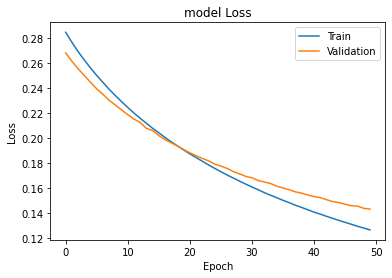

In [21]:
plot_loss(history)

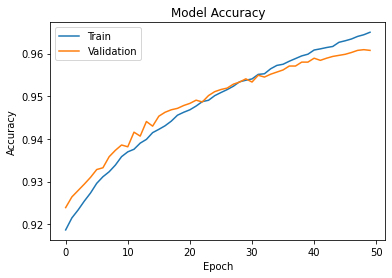

In [22]:
plot_acc(history)